In [7]:
import scanpy as sc
sc.settings.verbosity = 2

import pandas as pd

import tqdm.notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import array
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from scipy.stats import zscore, ttest_ind

# import torch
# import pyro
import random 
##function to generate random colors for coloring clusters
def random_colors(n): #n is the number of colors you need to generate
    color_set = np.zeros((n,3))
    for i in range(n):
        r = random.uniform(0, 1)
        b = random.uniform(0, 1)
        g = random.uniform(0, 1)
        color_set[i] = [r,b,g]
    return color_set



META_FILE = 'metadata_dli.csv'
DATA_FILE = 'log_norm_data.csv'

data_df = pd.read_pickle(DATA_FILE)
DECIPHER_FILE = 'decipher_T_trajectory.csv'
umap_ = pd.read_csv(META_FILE, index_col = 0)


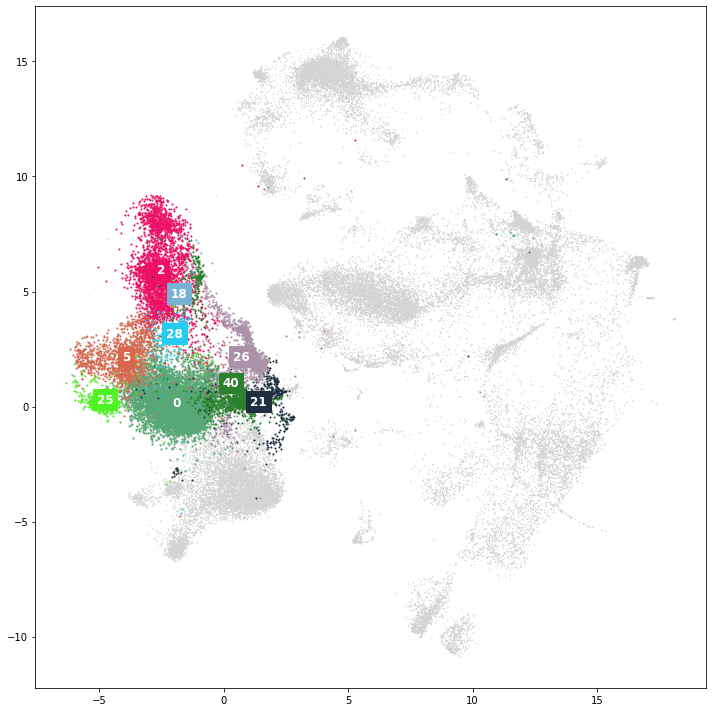

In [4]:
umap_ = pd.read_csv(META_FILE, index_col = 0)
umap_ = umap_[umap_['DATA']=='AML']

t_clusters= [0,2,5,18,21,25,26,28,40]
myeloid_cells = pd.Index([])
plt.figure(figsize=(10,10))
plt.scatter(umap_['x'],umap_['y'],s=2, edgecolors='none',color = "lightgrey")

n_cluster_knn = np.amax(umap_['cluster_number'])
color_set_clusters = random_colors(n_cluster_knn + 2)
#loop through labels and plot each cluster
for cluster in range(n_cluster_knn + 1):
    if cluster not in t_clusters: continue
    #add data points 
    cells = umap_.index[umap_.cluster_number == cluster]
    myeloid_cells = myeloid_cells.union(cells)
    plt.scatter(x=umap_.loc[cells, 'x'], 
                y=umap_.loc[cells, 'y'], s=1,
                color=color_set_clusters[cluster], 
                alpha=1)
    
    #add label
    plt.annotate(cluster, 
                 umap_.loc[cells,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight = 'bold',
                 color='white',
                 backgroundcolor=color_set_clusters[cluster]) 
    
plt.tight_layout()


#ACTUALLY RUNNING DECIPHER

# from load_data import load_datasets
# from decipher_model import DecipherConfig
# from decipher_training import train_simple
# counts = pd.read_pickle('~/all_counts_combined_NEW_revised.pkl')
# df = counts.loc[T.index]
# df = df.drop(columns = 'sample')

# # convert to sparse matrix (CSR method)
# sparse = csr_matrix(df)
# adata = sc.AnnData(sparse)
# adata.var_names = df.columns

# config = DecipherConfig(
#     latent_dim=10,
#     pre_latent_dim=2,
#     z_to_x_layers=[],
#     seed=0,
#     beta=1e-1
# )

# model, adata = train_simple(
#     adata,
#     config,
#     learning_rate=1e-2,
#     n_epochs=120,
#     plot_every_k_epoch=5,
#     plot_kwargs=dict(
#         color=["TIGIT",'ZNF683'],
#         vmax=lambda xs: np.quantile(xs, 0.95),
#         ncols=2,
#     ),
# )

# decipher_z = pd.DataFrame(adata.obsm['decipher_z'])
# decipher_z.index = df.index
# decipher_v = pd.DataFrame(adata.obsm['decipher_v'])
# decipher_v.columns = ['x','y']
# decipher_v.index = df.index
# decipher = pd.concat([decipher_v,decipher_z], axis = 1)



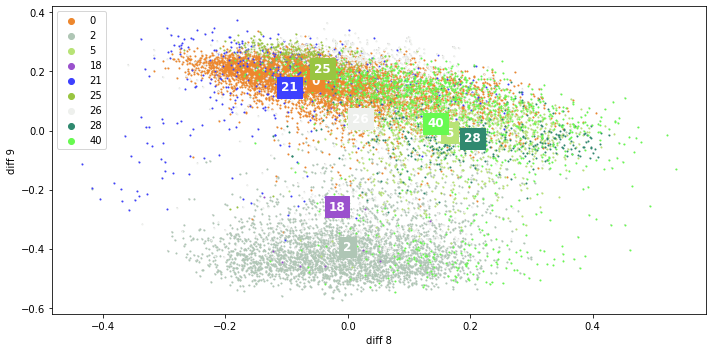

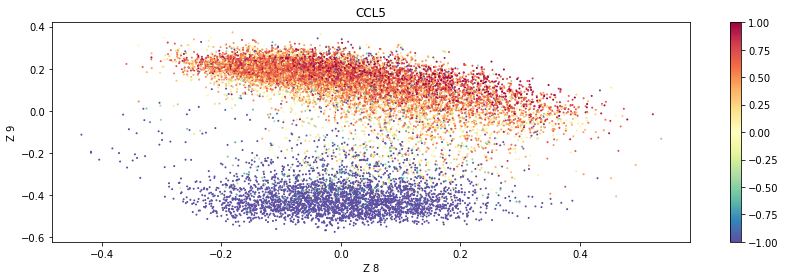

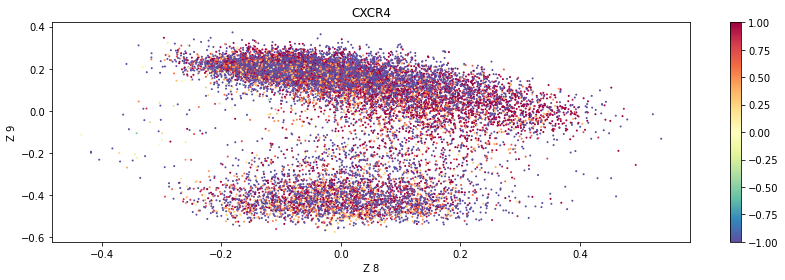

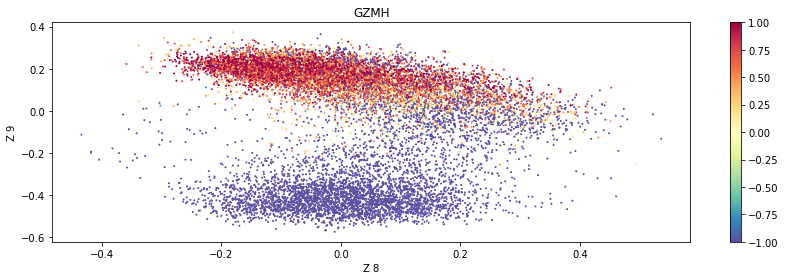

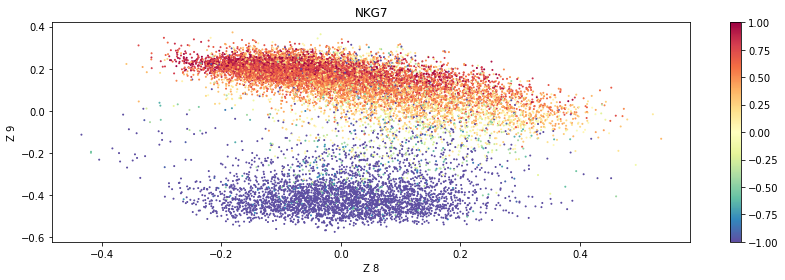

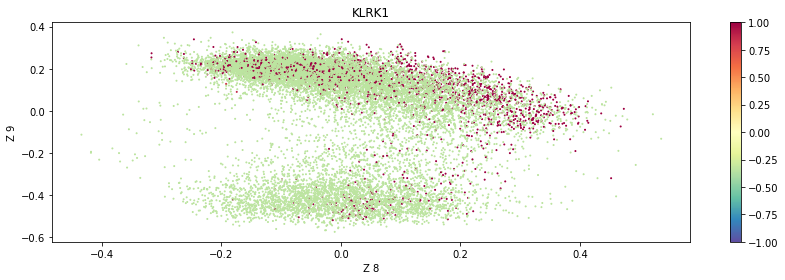

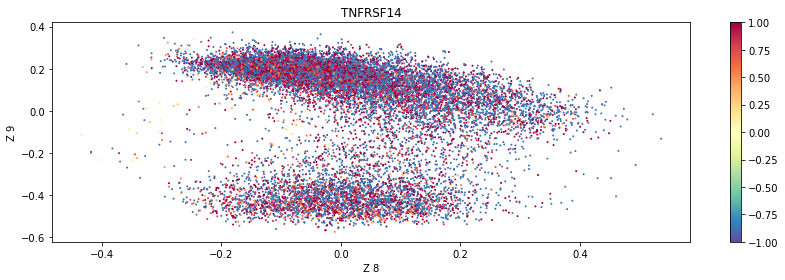

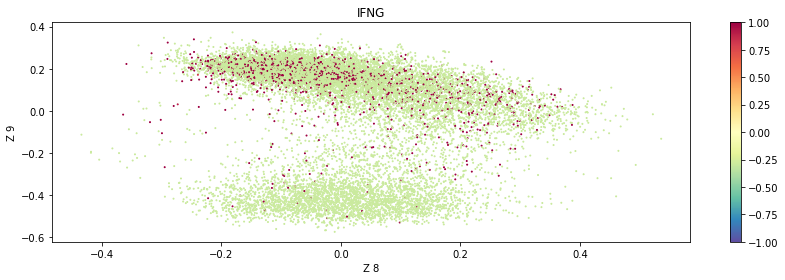

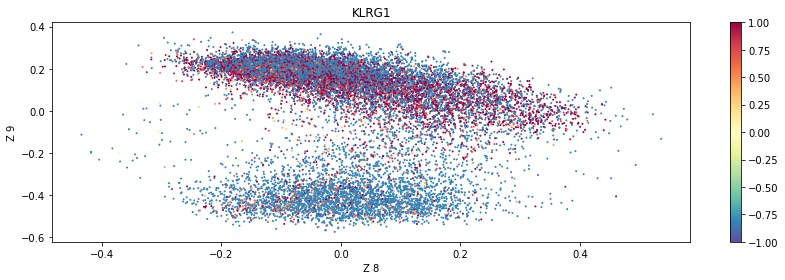

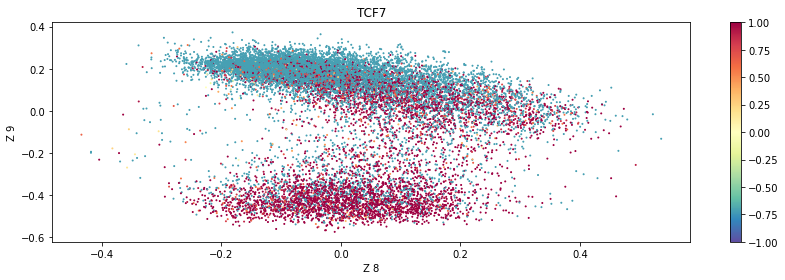

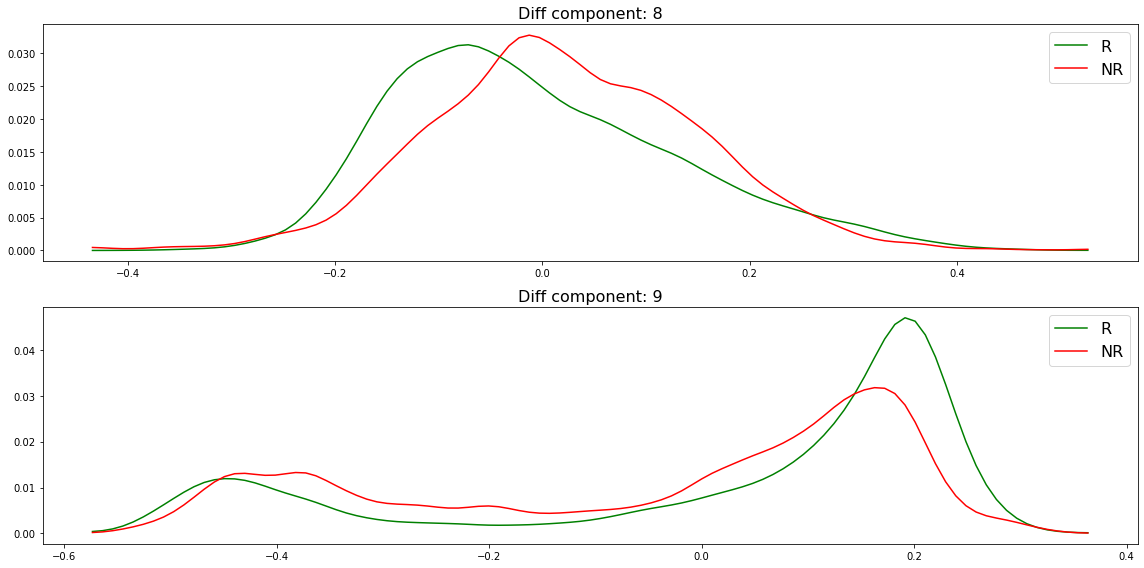

KstestResult(statistic=0.15699072666302338, pvalue=1.6650993784321896e-40, statistic_location=-0.04634712, statistic_sign=1)
KstestResult(statistic=0.494949494949495, pvalue=2.2405082590497952e-11, statistic_location=76.0, statistic_sign=-1)
KstestResult(statistic=0.2222222222222222, pvalue=0.014823199093273107, statistic_location=0.004096704793407428, statistic_sign=1)


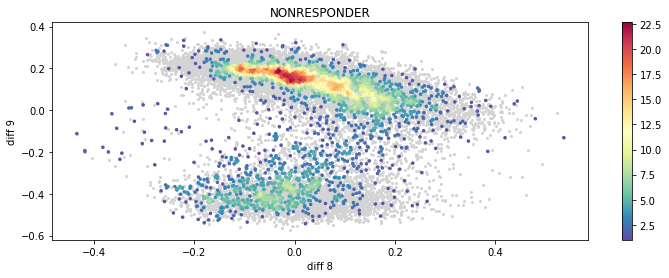

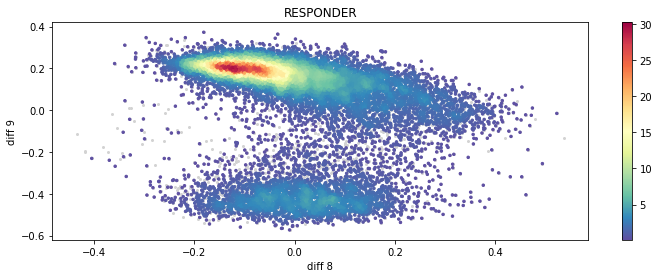

In [16]:
decipher = pd.read_csv(DECIPHER_FILE)
decipher_v = decipher[['x','y']]
decipher_z = decipher.iloc[:,2:]

COLUMN_arr = ['cluster_number']

for COLUMN in COLUMN_arr:
    decipher_umap[COLUMN] = umap_.loc[decipher_umap.index, COLUMN]
    n_cluster_knn =len(np.unique(decipher_umap[COLUMN]))
    color_set_clusters = random_colors(n_cluster_knn + 2)

    plt.figure(figsize=(10,5))
    plt.scatter(decipher_umap[x],decipher_umap[y],s=2, edgecolors='none',color = "lightgrey")

    #loop through labels and plot each cluster
    for i,cluster in enumerate(np.unique(decipher_umap[COLUMN])):
        #add data points 
        if cluster =='x': continue

        cells = decipher_umap.index[decipher_umap[COLUMN] == cluster]
        plt.scatter(x=decipher_umap.loc[cells, x], 
                    y=decipher_umap.loc[cells, y], s=1,
                    color=color_set_clusters[i], 
                    alpha=1, label = cluster)

        plt.annotate(cluster, 
                     decipher_umap.loc[cells,[x,y]].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=12, weight = 'bold',
                     color='white',
                     backgroundcolor=color_set_clusters[i]) 


    plt.legend(markerscale = 6)  
    plt.xlabel(f'diff {x}')
    plt.ylabel(f'diff {y}')
    plt.tight_layout()
#     plt.savefig(f'tcell_trajectory_colored_by_{COLUMN}.eps')
    plt.show()


    
    
x = 8
y = 9

decipher_umap = pd.DataFrame(decipher[[x,y]])
for gene in ['CCL5', 'CXCR4', 'GZMH', 'NKG7', 'KLRK1', 'TNFRSF14', 'IFNG', 'KLRG1', 'TCF7']:
    plt.figure(figsize = (12,4))
    plt.scatter(decipher_umap[x],decipher_umap[y], s = 1, cmap = cmap, 
                c = zscore(data_df.loc[decipher_umap.index,gene]),
               vmin = -1, vmax = 1)
    plt.title(gene)
    plt.xlabel(f'Z {x}')
    plt.ylabel(f'Z {y}')
    plt.colorbar()
    plt.tight_layout()
#     plt.savefig(f'tcell_trajectory_zscore_{gene}.eps')
    plt.show()

umap_t = umap_.loc[decipher_umap.index]
diff = decipher_umap


# responder=diff.loc[umap_t['response']=='RESPONDER']



#Cam's code to make kde plots
from scipy.ndimage import gaussian_filter1d

df=diff.loc[:,[x,y]]
n=df.shape[1]; max_cols=1

nrows=int(np.ceil(n/max_cols)); ncols=int(min((max_cols,n)))

responder=diff.loc[umap_t['response']=='RESPONDER']
nonresponder=diff.loc[umap_t['response']=='NONRESPONDER']

responder_hist_df=pd.DataFrame()
nonresponder_hist_df=pd.DataFrame()


bins_df=pd.DataFrame()
for i in df.columns:
    bins=np.linspace(min(min(responder[i]),min(nonresponder[i])),
                     max(max(responder[i]),max(nonresponder[i])),100)
    bins_df[i]=bins
    r_counts, _,r_plot=plt.hist(responder[i],bins=bins,color="green");
    nr_counts, _,nr_plot=plt.hist(nonresponder[i],bins=bins,color="orange");
    responder_hist_df[i]=r_counts
    nonresponder_hist_df[i]=nr_counts
    
r_ms=responder_hist_df.sum(axis=0)
nr_ms=nonresponder_hist_df.sum(axis=0)

r_hist_norm=pd.DataFrame(responder_hist_df.div(r_ms,axis=1))
nr_hist_norm=pd.DataFrame(nonresponder_hist_df.div(nr_ms,axis=1))

plt.close()

fig=plt.figure(figsize=[16*ncols,4*nrows])
counter = 0
for i in df.columns:
    ax=fig.add_subplot(nrows,ncols,counter+1)
    
    test_r = gaussian_filter1d(r_hist_norm[i],2)
    test_nr = gaussian_filter1d(nr_hist_norm[i],2)
    plt.plot(bins_df[i][0:99],test_r,c="green", label = 'R')
    plt.plot(bins_df[i][0:99],test_nr,c="red", label = 'NR')
#     plt.plot(bins_df[i][0:99],r_hist_norm[i],c="green",  alpha = 0.3)
#     plt.plot(bins_df[i][0:99],nr_hist_norm[i],c="red", alpha = 0.3)
    ax.set_title('Diff component: '+str(i),fontsize=16)
    counter += 1
    plt.legend(fontsize = 16)

fig.tight_layout()
# plt.savefig('tcell_trajectory_hist.eps')
plt.show()


from scipy.stats import kstest

print(kstest(responder[8],nonresponder[8]))
print(kstest(responder_hist_df[8],nonresponder_hist_df[8]))
print(kstest(test_r,test_nr))


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

umap_t = umap_.loc[decipher_umap.index]
diff = decipher_umap

    
for i,cluster in enumerate(np.unique(umap_t['response'])):
    fig = plt.figure(figsize = (12,4))
    ax = fig.add_subplot()
    cells = umap_t.index[umap_t['response']==cluster]
    x_ = diff.loc[cells,x]
    y_ = diff.loc[cells,y]
    # Calculate the point density
    xy = np.vstack([x_,y_])
    zz = gaussian_kde(xy,bw_method = 0.05)(xy)
    plot = ax.scatter(diff.loc[:,x], diff.loc[:,y],s = 4, color = 'lightgrey')
    plot = ax.scatter(diff.loc[cells,x], diff.loc[cells,y],s = 6, cmap = plt.cm.Spectral_r,c=zz)
    ax.set_xlabel(f'diff {x}')
    ax.set_ylabel(f'diff {y}')
#     ax.view_init(elev,azi)
    plt.colorbar(plot, ax = ax)
    plt.title(cluster)
#     string = cluster + '_diffusion.eps'
#     plt.savefig(f'tcell_trajectory_{cluster}_density.eps')
    plt.show()

    